In [1]:
import preprocess_util as util
import numpy as np
import tensorflow as tf
from train_premade_style import *
from preprocess_util import *
import os

import numpy as np
from os.path import exists
import imageio
import tensorflow.python.client as device_lib
print(tf.__version__)
device_lib.device_lib.list_local_devices()

2.12.0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8351301531982234592
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 16753526018629609164
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
 xla_global_id: -1]

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [2]:
s = train_style_model('./style_images/starry_night.jpg', 'D:\coco_data/train/data/', use_gpu=True)
s.save('starrynight200.h5')

/gpu:0
Train set has been trimmed slightly..
(256, 256, 3)
Epoch:  0
Training loss (for one batch) at step 256: 11519747.0000
Training loss (for one batch) at step 25856: 4104471.2500
Training loss (for one batch) at step 51456: 4012933.0000
Training loss (for one batch) at step 77056: 2925318.0000
Training loss (for one batch) at step 102656: 1847144.2500
Epoch:  1
Training loss (for one batch) at step 256: 2361569.0000
Training loss (for one batch) at step 25856: 2296990.0000
Training loss (for one batch) at step 51456: 2726450.5000
Training loss (for one batch) at step 77056: 1415824.2500
Training loss (for one batch) at step 102656: 1278813.5000
Epoch:  2
Training loss (for one batch) at step 256: 1691461.0000
Training loss (for one batch) at step 25856: 1108374.6250
Training loss (for one batch) at step 51456: 1832735.7500
Training loss (for one batch) at step 77056: 903435.7500
Training loss (for one batch) at step 102656: 974159.6875
Epoch:  3
Training loss (for one batch) at st

: 

: 

In [4]:
s = retrain_style_model('./style_images/starry_night.jpg', 'D:\coco_data/train/data/', use_gpu=True, partly_trained= 'starrynight500.h5')
s.save('starynight600.h5')

/gpu:0
Train set has been trimmed slightly..
(256, 256, 3)
Epoch:  0
Training loss (for one batch) at step 256: 173200.1562
Training loss (for one batch) at step 25856: 109237.5703
Training loss (for one batch) at step 51456: 147779.8125
Training loss (for one batch) at step 77056: 120226.6406
Training loss (for one batch) at step 102656: 113498.9844


INFO:tensorflow:Assets written to: checkpoint_0.0\assets


INFO:tensorflow:Assets written to: checkpoint_0.0\assets


Epoch:  1
Training loss (for one batch) at step 256: 173275.3594
Training loss (for one batch) at step 25856: 101603.4688
Training loss (for one batch) at step 51456: 129981.1094
Training loss (for one batch) at step 77056: 124023.4453
Training loss (for one batch) at step 102656: 109583.1641
Epoch:  2
Training loss (for one batch) at step 256: 148620.5312
Training loss (for one batch) at step 25856: 106850.0312
Training loss (for one batch) at step 51456: 155823.4062
Training loss (for one batch) at step 77056: 126598.5469
Training loss (for one batch) at step 102656: 112759.2500
Epoch:  3
Training loss (for one batch) at step 256: 164706.6719
Training loss (for one batch) at step 25856: 99713.5781
Training loss (for one batch) at step 51456: 159834.7656
Training loss (for one batch) at step 77056: 131630.2500
Training loss (for one batch) at step 102656: 114899.7109
Epoch:  4
Training loss (for one batch) at step 256: 173534.3594
Training loss (for one batch) at step 25856: 97799.554

KeyboardInterrupt: 

1/1 [==============================] - 0s 242ms/step


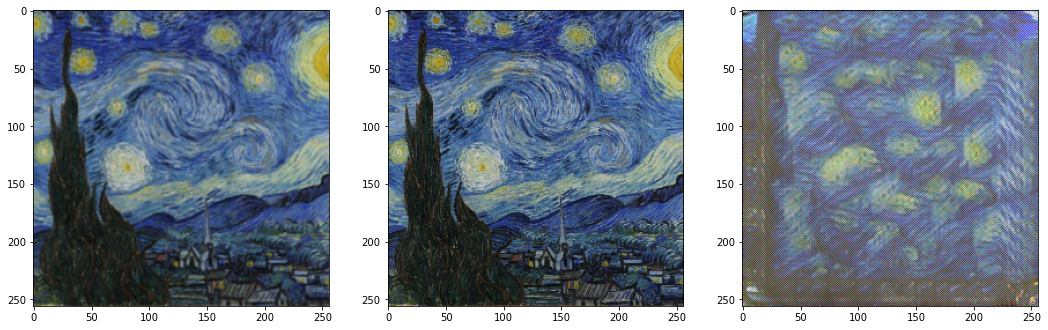

In [26]:

import NN_package as nn_package
import matplotlib.pyplot as plt
reconstructed_model = tf.keras.models.load_model("./trained_models/starrynight500.h5")
content_path = './style_images/starry_night.jpg'#'D:\coco_data/train/data/' + os.listdir('D:\coco_data/train/data/')[30]

style_path = './style_images/starry_night.jpg'
batch_size = 1
#Load and reshape style image
style_image = util.load_img(style_path)
#blurr style image a bit to ignore some content capture
style_image = tf.nn.avg_pool(style_image, ksize = [3,3], strides = [1,1], padding = 'SAME')
style_image = util.preprocess_image(style_image, 256)

batch_size = 1
batch_shape = (batch_size, 256, 256, 3)#
style_shape = tf.squeeze(style_image).shape


content_image = util.load_img(content_path)
content_image = util.preprocess_image(content_image, 256)

test_image = reconstructed_model.predict(content_image, batch_size=batch_size)
def imshow(image, title = None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis = 0)
        plt.imshow(image)
        if title:
            plt.title(title)
#test_image/=255
plt.figure(figsize = (18,18))
plt.subplot(1,3,1)
imshow(style_image)
plt.subplot(1,3,2)
imshow(content_image)
#test_image = tf.clip_by_value(test_image, clip_value_min=0.0, clip_value_max=1.0)
plt.subplot(1,3,3)

imshow(test_image)

In [32]:
print(tf.reduce_min(test_image), tf.reduce_max(test_image))
print(tf.reduce_min(content_image))
print(tf.reduce_max(style_image))


tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.9460561, shape=(), dtype=float32)
tf.Tensor(0.0018283721, shape=(), dtype=float32)
tf.Tensor(0.80387115, shape=(), dtype=float32)


In [ ]:
content_image = util.load_img(content_path)
content_image = util.preprocess_image(content_image, 256)
#imshow(content_image)
tf.squeeze(content_image)

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.5301064 , 0.48769575, 0.383079  ],
        [0.78110194, 0.7778458 , 0.7241775 ],
        [0.97295463, 0.9871531 , 0.96215117],
        ...,
        [0.48625597, 0.5711983 , 0.24306716],
        [0.41239408, 0.47690025, 0.21067083],
        [0.3272064 , 0.3813091 , 0.20492046]],

       [[0.675771  , 0.6757598 , 0.6110693 ],
        [0.6535451 , 0.67049086, 0.4821597 ],
        [0.8045439 , 0.8200306 , 0.7228377 ],
        ...,
        [0.38356948, 0.43724838, 0.21762705],
        [0.42748675, 0.48138353, 0.23802099],
        [0.44245747, 0.5029073 , 0.28509694]],

       [[0.7369377 , 0.75597507, 0.7092741 ],
        [0.4486249 , 0.49002257, 0.3252682 ],
        [0.60810804, 0.6337366 , 0.5314442 ],
        ...,
        [0.381478  , 0.43329558, 0.19003935],
        [0.37029323, 0.42894724, 0.19443904],
        [0.38588047, 0.45900485, 0.21158662]],

       ...,

       [[0.5346786 , 0.63858926, 0.59102684],
        [0.47

import NN_package as nn


style_shape = tf.squeeze(style_image).shape
X_content = tf.keras.Input(name = 'X_Content', shape = style_shape, batch_size=batch_size)
stlized = nn.stylelizer(X_content)
tf.keras.Model(X_content, stlized)